## Project: Building your Facial Expression

Stage 1: Setup and Data Exploration

What we'll do: We'll import all the necessary libraries and define our file paths.



Why: We need to load our "tools" (libraries like TensorFlow) and tell our notebook exactly where to find the image data. We'll also take a quick peek at the images to understand what we're working with.




Stage 2: Building the Data Pipeline
What we'll do: We'll use Keras to automatically load the images from your train and test folders. We will resize them, turn them to grayscale, normalize their pixel values, and batch them.

Why: The model can't just "see" a folder of JPGs. It needs data in a specific, clean format:

Resize (48x48): All images must be the same size.

Grayscale: We only care about shapes, not color, which simplifies the problem.

Normalize (0-1): We'll scale pixel values from 0-255 down to 0-1. This makes the math much easier and more stable for the model to learn.

Batch: We feed the model images in "batches" (e.g., 64 at a time) instead of one-by-one, which is far more efficient.

Stage 3: Building the CNN Model (The "Brain")
What we'll do: We will design the architecture of our neural network, layer by layer.

Why: This is the core of Deep Learning. We'll build a Convolutional Neural Network (CNN), which is specifically designed for images. We'll use layers like:

Conv2D: The "feature extractor" that learns to find edges, corners, and shapes.

MaxPooling2D: The "shrinker" that reduces the image size to focus on the most important features.

Flatten: A "flattener" that converts the 2D image data into a 1D list.

Dense: The "decision-maker" layers that take the features and vote on which emotion it is.

Stage 4: Compiling and Training the Model
What we'll do: We'll compile the model (choose its "learning strategy") and then train it using our data (model.fit()).

Why:

Compile: We need to give the model three things: an optimizer (how to learn, e.g., 'Adam'), a loss function (how to measure its mistakes, e.g., 'categorical_crossentropy'), and metrics (what to report to us, e.g., 'accuracy').

Train: This is the "learning" part. The model will look at a batch of images, make a guess, be told its mistakes (loss), and adjust itself (optimizer). We will repeat this for many "epochs" (full passes through the data).

Stage 5: Evaluation and Saving
What we'll do: We'll test our trained model against the test dataset (which it has never seen) to get an honest score. Then, we'll save the final, trained model to a single file.

Why: This proves our model actually learned, not just memorized the training data. Saving the model (e.g., as facial_expression_model.h5) allows your app.py file to load it and use it for predictions on new images

Stage 1: Setup and Data Exploration

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
print("Libraries imported successfully.")
print(f"TensorFlow Version: {tf.__version__}")

Libraries imported successfully.
TensorFlow Version: 2.20.0


 tensorflow (as tf): This is the main library, our "engine" for building and training the deep learning model. We use 'tf.keras' specifically, 
which is a user-friendly way to build models.

os: This stands for "Operating System". We use it to intelligentlyjoin file paths (like 'data/facial_expression') so our code works on any OS (Windows, Mac, or Linux).


 numpy (as np): A powerful library for handling large arrays of numbers.Our images will be loaded as NumPy arrays.

 matplotlib.pyplot (as plt): This is our "graphing" tool. We'll use it to plot our training progress and to look at a few sample images from our dataset.

In [2]:
# --- Notebook Step 2: Define Constants and Paths ---
#
# WHY are we defining these?
# We put all our main settings in one place so they are easy to 
# change later.
#

In [3]:
# Constants
IMG_HEIGHT=48 #FER2013 HAS 48 X 48 PIXEL IMAGES
IMG_WIDTH=48  #FER2013 HAS 48 X 48 PIXEL IMAGES
BATCH_SIZE=32 #We will train the model on batches of 32 images at a time this is good
              # balance Between speed and accuracy

In [4]:
base_dir = '..' 
data_dir = os.path.join(base_dir, 'data', 'facial_expression')
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

In [5]:
print(f"Training data will be loaded from: {train_dir}")
print(f"Test data will be loaded from: {test_dir}")
print("Listing parent data folders:", 
      os.listdir(os.path.join(base_dir, 'data'))
        if os.path.exists(os.path.join(base_dir, 'data'))
          else "data/ not found")


Training data will be loaded from: ..\data\facial_expression\train
Test data will be loaded from: ..\data\facial_expression\test
Listing parent data folders: ['audio', 'facial_expression', 'processed', 'raw']


In [6]:

# Get class names (only if path exists)
if os.path.exists(train_dir):
    class_names = sorted(os.listdir(train_dir))
    print(f"\nFound {len(class_names)} classes (emotions):")
    print(class_names)
else:
    raise FileNotFoundError(f"Train folder not found: {train_dir} — please check your data path (expected under [data/facial_expression](data/facial_expression))")
# ...existing code...


Found 7 classes (emotions):
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [7]:
# --- Notebook Step 3: Explore the Data (Optional but Recommended) ---
#
# WHY are we doing this?
# To confirm our paths are correct and to see what our data 
# actually looks like.
#
# Get the list of emotion class names (which are just the folder names)


In [8]:
class_names = sorted(os.listdir(train_dir))
print(f"\nFound {len(class_names)} classes (emotions):")
print(class_names)


Found 7 classes (emotions):
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


##### STEP 3 : EXPLORE THE DATA
LETS DISPLAY ONE SAMPLE IMAGE

In [9]:
# sample_image_path=os.path.join(
#     train_dir,
#     'happy',
#     'PrivateTest_2632278430.jpg'
# )

In [10]:
# List available images in the happy folder
happy_dir = os.path.join(train_dir, 'happy')
if os.path.exists(happy_dir):
    available_images = os.listdir(happy_dir)
    if available_images:
        # Use the first available image
        sample_image_path = os.path.join(happy_dir, available_images[0])
        print("Available images in happy folder:", available_images)
    else:
        print("No images found in the happy folder")
else:
    print(f"Happy folder not found at: {happy_dir}")

# Rest of your image loading code remains the same

Available images in happy folder: ['Training_10019449.jpg', 'Training_10046809.jpg', 'Training_10066226.jpg', 'Training_10070997.jpg', 'Training_10080933.jpg', 'Training_10109375.jpg', 'Training_10116721.jpg', 'Training_10127474.jpg', 'Training_10133389.jpg', 'Training_10139297.jpg', 'Training_10142161.jpg', 'Training_10142426.jpg', 'Training_10181727.jpg', 'Training_1018317.jpg', 'Training_10199847.jpg', 'Training_10209551.jpg', 'Training_10220224.jpg', 'Training_10229138.jpg', 'Training_10230185.jpg', 'Training_10239785.jpg', 'Training_10240470.jpg', 'Training_10242543.jpg', 'Training_10246389.jpg', 'Training_10248095.jpg', 'Training_10257744.jpg', 'Training_10265501.jpg', 'Training_1027250.jpg', 'Training_10288829.jpg', 'Training_10290756.jpg', 'Training_10313464.jpg', 'Training_10348116.jpg', 'Training_10361011.jpg', 'Training_10367793.jpg', 'Training_10391066.jpg', 'Training_1041361.jpg', 'Training_10422282.jpg', 'Training_10425802.jpg', 'Training_10435640.jpg', 'Training_10437958


 Sample image loaded successfully from: ..\data\facial_expression\train\happy\Training_10019449.jpg


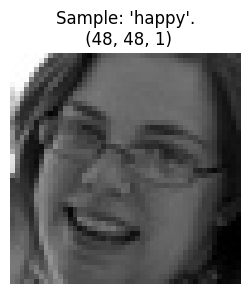

In [11]:
try:
    img=tf.keras.utils.load_img(
        sample_image_path,
        color_mode="grayscale",
        target_size=(IMG_HEIGHT, IMG_WIDTH)
    )
    img_array=tf.keras.utils.img_to_array(img)
    print(f"\n Sample image loaded successfully from: {sample_image_path}")

    plt.figure(figsize=(3,3))
    plt.imshow(img_array[:,:,0],
               cmap='gray')
    plt.title(f"Sample: 'happy'.\n {img_array.shape}")
    plt.axis('off')
    plt.show()
except FileNotFoundError:
    print(f"\n Note : Sample image {sample_image_path} not found. Please ensure your data is correctly placed.")
    print("Skipping sample image display.")

except Exception as e:
    print(f"\n An error occurred while loading the sample image: {e}")

### Building the Data Pipeline
Now we'll use a powerful Keras function to automatically load, preprocess, and batch all the images from the folders you set up. This is much faster than loading them one by one.


In [12]:
# --- Notebook Step 4: Create TensorFlow Datasets ---
#
# WHY are we doing this?
# We need to load all ~35,000 images, not just one sample.
# 'image_dataset_from_directory' is a magic function that does
# all the hard work for us.

In [13]:
# It automatically:
# 1. Scans the sub-folders ('happy', 'sad', etc.)
# 2. Uses the folder names as the correct labels.
# 3. Resizes all images to our (IMG_HEIGHT, IMG_WIDTH).
# 4. Sets the color mode to 'grayscale'.
# 5. Batches the data (puts them into groups of BATCH_SIZE).
# 6. Converts labels to 'categorical' (one-hot encoding) 
#    e.g., 'happy' -> [0, 0, 1, 0, 0, 0, 0]

In [14]:
print("Creating data generators...")

Creating data generators...


In [15]:
## Create training dataset
# we will slpit out train folder into two parts:
# 80% for actual training (train_ds)
# 20 % for validation (val_ds)


In [16]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_HEIGHT,IMG_WIDTH),
    color_mode='grayscale',
    batch_size=BATCH_SIZE
)


Found 28709 files belonging to 7 classes.
Using 22968 files for training.


In [17]:
val_ds=tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_HEIGHT,IMG_WIDTH),
    color_mode='grayscale',
    batch_size=BATCH_SIZE
)

Found 28709 files belonging to 7 classes.
Using 5741 files for validation.


In [18]:
test_ds=tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=(IMG_HEIGHT,IMG_WIDTH),
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    shuffle=False   #we do not need to shuffle the test data
)

Found 7178 files belonging to 7 classes.


In [19]:
print("Data generators created successfully.")
print(f"Class names(emotions):{train_ds.class_names}")


Data generators created successfully.
Class names(emotions):['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [20]:
## Step 5: Normalize and Opti,ize the Datasets
# WHY are we doing this?
#
# 1. Normalization: We need to scale pixel values.
#    Computers see images as numbers from 0 (black) to 255 (white).
#    Neural networks train *much* better when these numbers
#    are small, so we'll rescale them to be between 0 and 1.
#    We do this by creating a "rescaling layer".
#
# 2. Performance:
#    .cache() keeps the images in memory after they're loaded
#    once, so we don't have to read them from disk every epoch.
#    .prefetch() loads the *next* batch of data while the 
#    model is training on the *current* batch. This prevents
#    the model from "waiting" for data and speeds up training.

In [21]:
#Creating the Normalization layer
normalization_layer=tf.keras.layers.Rescaling(1./255)
#Applying the normalization to the datasets
# we use map function to apply normalization layer to each image batch
AUTOTUNE=tf.data.AUTOTUNE
train_ds=train_ds.map(lambda x,y:(normalization_layer(x),y),
                      num_parallel_calls=AUTOTUNE)

val_ds=val_ds.map(lambda x,y:(normalization_layer(x),y),
                  num_parallel_calls=AUTOTUNE)

test_ds=test_ds.map(lambda x,y:(normalization_layer(x),y),
                    num_parallel_calls=AUTOTUNE)


In [22]:
#apply the performance optimizations
train_ds=train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds=test_ds.cache().prefetch(buffer_size=AUTOTUNE)
print("Datasets normalized and optimized for performance.")

Datasets normalized and optimized for performance.


### Stage 3: Building the CNN Model (The "Brain")
We will build our model using the Keras Sequential API. Think of this as stacking building blocks (layers) one on top of the other.

In [23]:
# --- Notebook Step 6: Define the Model Architecture ---
#
# WHY are we doing this?
# This is the "recipe" or "blueprint" for our model's brain.
# We are creating a "Sequential" model, which just means a simple
# stack of layers, where the output of one layer feeds directly 
# into the input of the next.

In [24]:
model=tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(32,(3,3),activation='relu',
                               input_shape=(IMG_HEIGHT,IMG_WIDTH,1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.25),

        ## CONVULATION BLOCK 2--
        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.25),

        ## CONVULATION BLOCK 3--
        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.25),

        ## The Classifier Head
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),

        ##Final Output Layer
        tf.keras.layers.Dense(len(class_names),activation='softmax')

    ]
)
model.summary()

c:\Users\kushagra\Desktop\CSAI\Depression_Detection_Model\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,148,295 (4.38 MB)

 Trainable params: 1,146,823 (4.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

### Stage 4: Compiling and Training the Model
This is where all our preparation pays off
1. Compile the model 
2. Train the model (run model.fut)

In [25]:
#STEP8:: Compile the Model

# WHY are we doing this?
# We built the "blueprint" (architecture), but now we need to give
# it its tools and instructions for *how* to learn.
# We need to define three key things:

# 1. The Optimizer:
#    This is the "engine" that drives the learning. It's the
#    algorithm that decides *how* to adjust the model's (many)
#    parameters to reduce the 'loss' (mistakes).
#    'Adam' (Adaptive Moment Estimation) is the most popular,
#    effective, and safe-bet optimizer. It works great for
#    almost all problems.

# 2. The Loss Function:
#    This is how the model "measures its mistakes."
#    'categorical_crossentropy' is the standard loss function for
#    multi-class classification (i.e., when you have 3 or more
#    classes, like our 7 emotions).
#    It compares the model's probability predictions (from softmax)
#    to the true one-hot label and calculates a "loss" score.
#    A high score = big mistake. A low score = good guess.
#    The optimizer's only job is to make this score as low as possible.

# 3. The Metrics:
#    This is what *we* (the humans) want to see reported
#    during training. We care about 'accuracy' (the percentage
#    of images the model guessed correctly). The model doesn't
#    optimize for this, but it's our main way to see if it's
#    learning.

In [26]:
print("Compiling the model....")
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']

)
print("Model compiled successfully.")

Compiling the model....
Model compiled successfully.


In [27]:
# --- Notebook Step 9: Train the Model ---
#
# This is it! This is the 'start' button.
#
# model.fit() will:
# 1. Take our optimized 'train_ds'
# 2. Show a batch to the model.
# 3. Let the model guess.
# 4. Calculate the 'loss' (the mistake).
# 5. Use the 'optimizer' (Adam) to update the model's weights.
# 6. Repeat for all batches in the dataset. This is one 'Epoch'.
# 7. At the end of each epoch, it will run our 'val_ds'
#    (the 20% validation set) to give us an honest,
#    unbiased score ('val_accuracy') to see if the
#    model is *actually* learning or just memorizing.

In [28]:
print("\nStarting model training...")
# We set the number of epochs (how many times to go through
# the full training dataset). 30-50 is a good start.
EPOCHS = 30 

# We save the training history (loss, accuracy, etc.)
# in a 'history' variable so we can plot it later.
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

print("\nModel training finished.")


Starting model training...
Epoch 1/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 122s 162ms/step - accuracy: 0.3228 - loss: 1.9702 - val_accuracy: 0.4050 - val_loss: 1.5904
Epoch 2/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 46s 64ms/step - accuracy: 0.4306 - loss: 1.5060 - val_accuracy: 0.4588 - val_loss: 1.4140
Epoch 3/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 45s 62ms/step - accuracy: 0.4596 - loss: 1.4128 - val_accuracy: 0.4940 - val_loss: 1.3322
Epoch 4/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 47s 65ms/step - accuracy: 0.4869 - loss: 1.3378 - val_accuracy: 0.4945 - val_loss: 1.3512
Epoch 5/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 45s 63ms/step - accuracy: 0.5068 - loss: 1.2950 - val_accuracy: 0.5051 - val_loss: 1.3212
Epoch 6/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 46s 64ms/step - accuracy: 0.5167 - loss: 1.2650 - val_accuracy: 0.4632 - val_loss: 1.4368
Epoch 7/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 46s 64ms/step - accuracy: 0.5319 - loss: 1.2266 - val_accuracy: 0.5024 - val_loss: 1.3850
Epoch 8/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 46s 65ms/step - accu

In [29]:
print("\nModel training finished.")

# --- Add this line ---
model.save('my_model.keras')  # Saves the model to a file

print("\nModel saved successfully!")


Model training finished.

Model saved successfully!
